# Training

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import train feature table. Path must be changed before use
reference = pd.read_csv('C:/Users/Quynh Anh/Muskelultraschall/features_train.csv')
#remore Image_ID columns
reference.drop('Image_ID', axis='columns', inplace=True)
reference

,Krank/Gesund,bone_Mean_Hist,bone_Median_Hist,bone_Std_Hist,bone_Skewness_Hist,bone_Kurtosis_Hist,bone_Contrast,bone_Dissimilarity,bone_Homogeneity,bone_Energy,...,muscle_Dissimilarity,muscle_Homogeneity,muscle_Energy,muscle_Correlation,muscle_Entropy,muscle_SRE,muscle_LRE,muscle_GLU,muscle_RLU,muscle_RPC
0,1.0,256.0,20.5,446.24240,2.114273,3.652074,14.437837,2.818382,0.312692,0.039491,...,4.076218,0.215416,0.028487,0.968267,10.679145,1.293,222.770,829.121,2419.194,14.969
1,1.0,256.0,102.5,320.41440,1.779888,3.304561,20.806480,3.346186,0.281210,0.031205,...,3.341658,0.271520,0.031225,0.990055,10.664962,1.708,388.677,873.996,3763.719,15.538
2,1.0,256.0,16.5,498.70007,4.998870,35.975754,22.928738,3.234344,0.362949,0.074347,...,5.061208,0.179464,0.026062,0.950176,10.941293,1.498,177.398,749.280,2915.920,15.922
3,0.0,256.0,88.5,277.89570,0.693151,-1.211150,45.744960,5.031817,0.193467,0.021439,...,4.385089,0.203916,0.024193,0.986191,11.244161,1.527,262.602,837.613,2779.211,14.793
4,0.0,256.0,167.0,263.16104,1.067885,0.473762,40.767754,4.387822,0.263588,0.029136,...,5.599163,0.166939,0.019854,0.981514,11.781098,1.718,125.003,630.340,4639.832,19.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.0,256.0,131.0,490.03384,8.398188,90.081230,47.041973,4.706281,0.311087,0.103702,...,4.664555,0.198204,0.024917,0.981529,11.193281,1.574,166.200,695.317,4333.163,19.002
202,1.0,256.0,110.0,487.63550,7.761735,86.111290,30.487485,3.762515,0.339347,0.087143,...,4.988004,0.182505,0.022618,0.972817,11.304793,1.400,250.452,842.878,2312.494,14.042
203,1.0,256.0,44.0,371.43740,1.476558,0.859020,25.514338,3.851256,0.237210,0.027737,...,4.869525,0.189635,0.021085,0.981696,11.499324,1.599,158.480,683.651,3910.601,18.308
204,1.0,256.0,15.0,679.23590,4.544353,22.209640,10.239936,2.099494,0.435746,0.081865,...,3.854761,0.230716,0.030992,0.968608,10.467531,1.298,316.041,938.559,2006.816,13.122


In [84]:
#create training data
X_train = reference.iloc [:, 1:]
y_train = reference.iloc [:, 0]

In [88]:
#initiate SVM model
model = SVC()

In [87]:
#feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [98]:
# Define SVM parameter. Perform Grid Search with 5-times Cross Validation
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define F1 as scoring metrics
#alternative: try accuray
f1_scorer = make_scorer(f1_score)

# Initialise Hyperparameter Tuning
grid_search = GridSearchCV(model, param_grid, scoring=f1_scorer, cv=10, verbose = 1, n_jobs = -1)
grid_search.fit (X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(f1_score), verbose=1)

In [99]:
#find out best parameter
final_param = grid_search.best_params_
final_score = grid_search.best_score_
print (f"Final parameter: {final_param}")
print (f"Final score: {final_score}")

Final parameter: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Final score: 0.9129789889744122


In [91]:
#find out best parameter
final_param = grid_search.best_params_
final_score = grid_search.best_score_
print (f"Final parameter: {final_param}")
print (f"Final score: {final_score}")

Final parameter: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Final score: 0.9000211170942878


In [92]:
#find out best model
final_model = grid_search.best_estimator_

In [93]:
#save model 
joblib.dump (final_model, 'SVM_model.pkl')

['SVM_model.pkl']

# Evaluation

In [100]:
#load feature matrix of test set
feature_test = pd.read_csv('C:/Users/Quynh Anh/Muskelultraschall/features_test.csv')
feature_test.drop('Image_ID', axis='columns', inplace=True)

X_test = feature_test.iloc [:, 1:]
y_test = feature_test.iloc [:, 0]

#feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [101]:
#create prediction
loaded_model = joblib.load('SVM_model.pkl')
y_pred = loaded_model.predict(X_test)

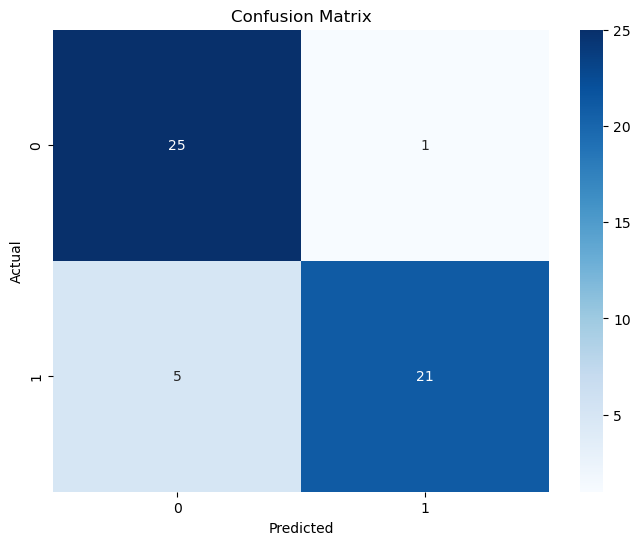

In [105]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [106]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score (y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8846153846153846
F1 Score: 0.875


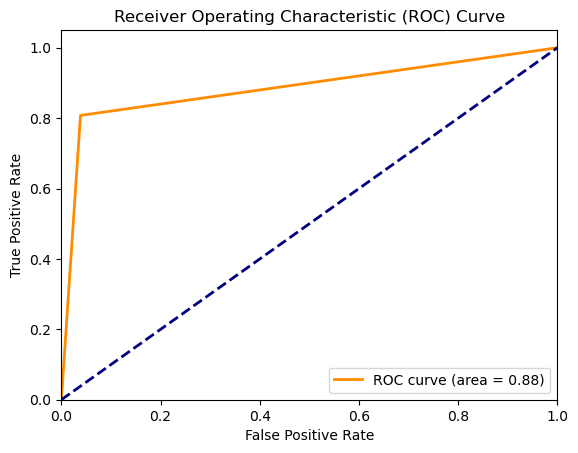

In [111]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Use the positive class probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()